# 3.6 Guia - Clusterização

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dados = pd.read_csv('wine-clustering.csv')

In [3]:
base_dados.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Verificando as Colunas

for Coluna in base_dados.columns:
    print(Coluna)

Alcohol
Malic_Acid
Ash
Ash_Alcanity
Magnesium
Total_Phenols
Flavanoids
Nonflavanoid_Phenols
Proanthocyanins
Color_Intensity
Hue
OD280
Proline


In [5]:
# Verificando o shape
base_dados.shape

(178, 13)

In [6]:
# Verificando a dimensão
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
# Estatisticas sobre os dados
base_dados.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

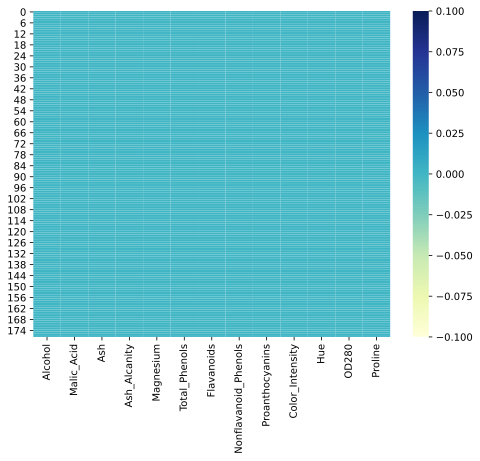

In [9]:
# Verificando valores nulos
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(base_dados.isnull(),cmap='YlGnBu',cbar=True);

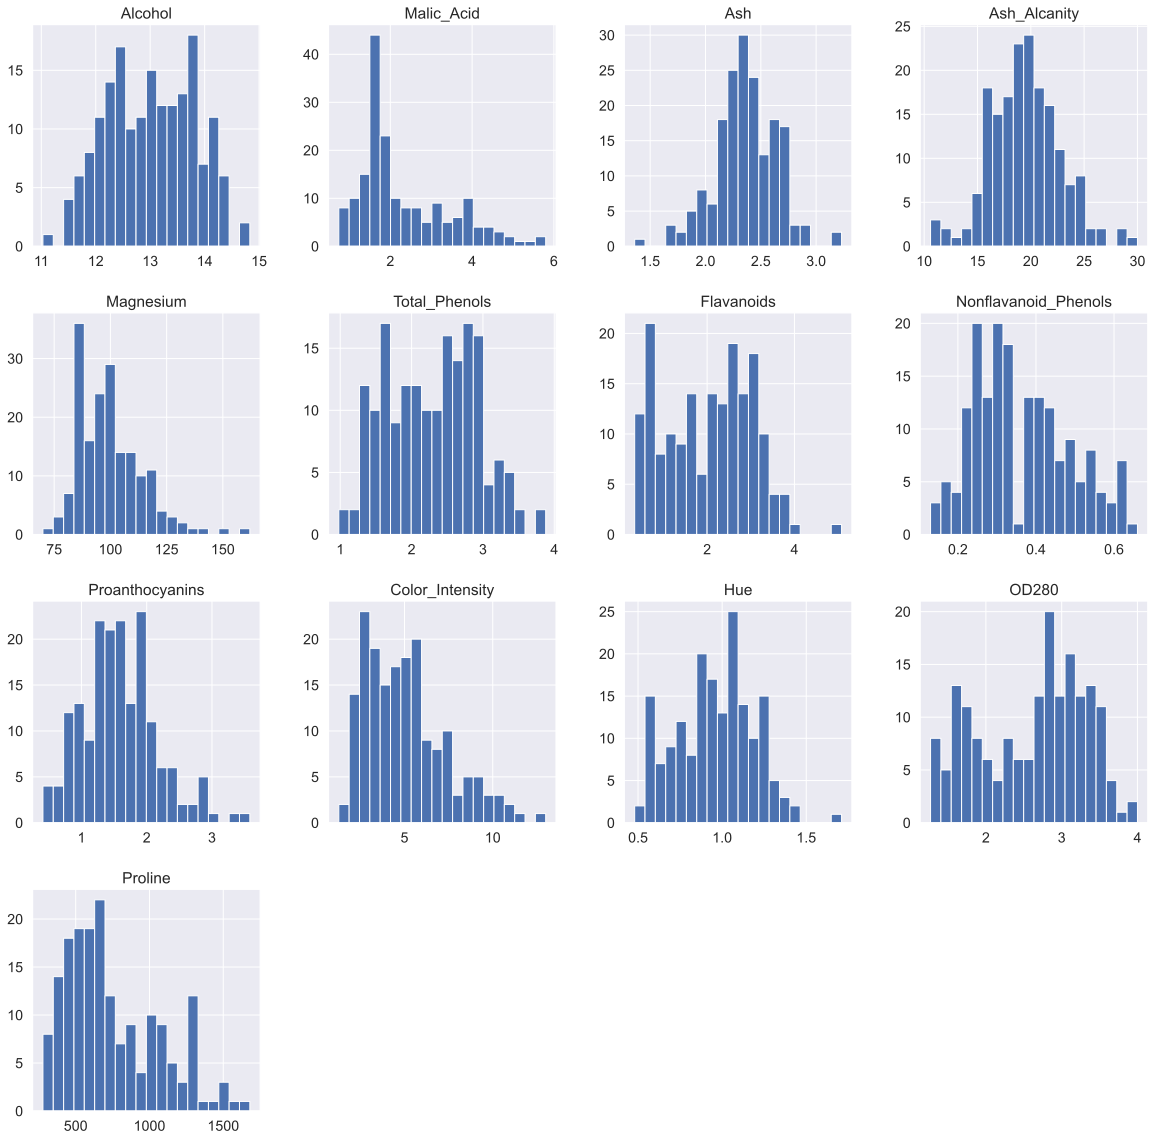

In [10]:
# Plotando todos os dados
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=base_dados.hist(bins=20,color='b')

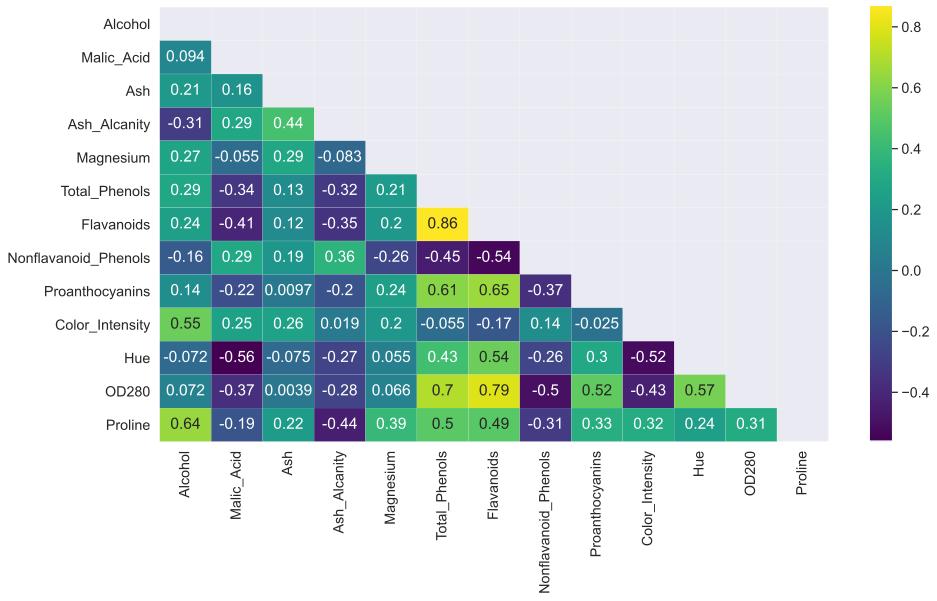

In [12]:
# Verificando correlação
fig,ax = plt.subplots(figsize=(15,8))
mask = np.triu(np.ones_like(base_dados.corr(), dtype=np.bool))
sns.heatmap(base_dados.corr(), linewidths=.1,cmap='viridis',annot=True,mask=mask);

In [13]:
# Biblioteca para escalonamento dos dados
from sklearn.preprocessing import StandardScaler

base_dados_02=base_dados.copy()

Funcao_escalonamento=StandardScaler()
Dados_escalonados=Funcao_escalonamento.fit_transform(base_dados_02)

In [14]:
# verificando os registros
Dados_escalonados[0:4]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383]])

In [16]:
# Aplicando a redução de Dimensionalidade
# Reduzindo de 10 para 2

from sklearn.decomposition import PCA
Funcao_PCA=PCA(n_components=2)
dados_PCA=Funcao_PCA.fit_transform(Dados_escalonados)

In [17]:
# Verificando o 1º primeiro registro
dados_PCA[0:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [18]:
# Importando o modelo Kmeans
from sklearn.cluster import KMeans

Distancia_Cluster=[]
Repeticoes = range(1,20)

# Loop para analisar a distancia do cluster
for x in Repeticoes:
    Modelo_Kmeans = KMeans(n_clusters=x)
    Modelo_Kmeans.fit(Dados_escalonados)
    Distancia_Cluster.append(Modelo_Kmeans.inertia_)
print(Distancia_Cluster)

[2313.9999999999986, 1658.7588524290961, 1277.928488844643, 1175.7051928197127, 1105.2718381681862, 1047.739838774491, 987.8346110779106, 952.1276454828464, 890.6081707862204, 853.1085499417029, 828.2895556947711, 784.9917403047222, 772.9316846736402, 756.0568845786865, 740.1230679717844, 701.7511395140946, 681.2924661750492, 667.0888139254931, 648.9029502939096]


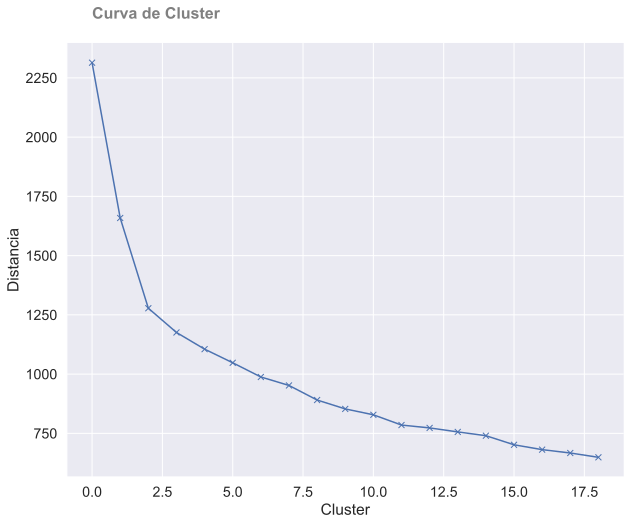

In [20]:
# Plotando a curva

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(Distancia_Cluster,'bx-')
plt.xlabel('Cluster')
plt.ylabel('Distancia')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x=0,
        y=2500,
        s='Curva de Cluster',
        fontsize=16,
        color='grey',
        weight='bold');

In [21]:
# Aplicando o Cluster
Modelo_Kmeans = KMeans(n_clusters=3)
Modelo_Kmeans.fit(Dados_escalonados)
Centroides = Modelo_Kmeans.cluster_centers_
Rotulos = Modelo_Kmeans.labels_

In [22]:
# Verificando a divisão
Rotulos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
# Ajustando os Dados para uma Tabela

Base_PCA = pd.DataFrame(data=dados_PCA, columns=['Eixo_1','Eixo_2'])
Base_PCA.head()

,Eixo_1,Eixo_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


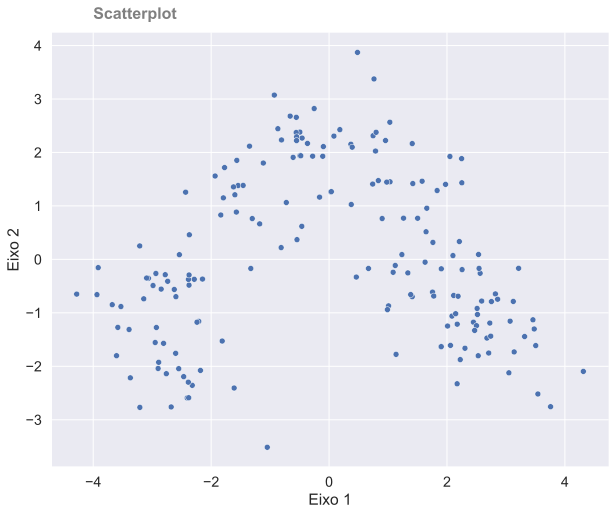

In [27]:
# Plotando o gráfico
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='Eixo_1',y='Eixo_2',data=Base_PCA)
plt.xlabel('Eixo 1')
plt.ylabel('Eixo 2')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x=-4,
        y=4.5,
        s='Scatterplot',
        fontsize=16,
        color='grey',
        weight='bold');

In [28]:
# Juntando os dados do PCA
A = pd.concat([Base_PCA,pd.DataFrame({'Cluster':Rotulos})],axis=1)
A.head()

,Eixo_1,Eixo_2,Cluster
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


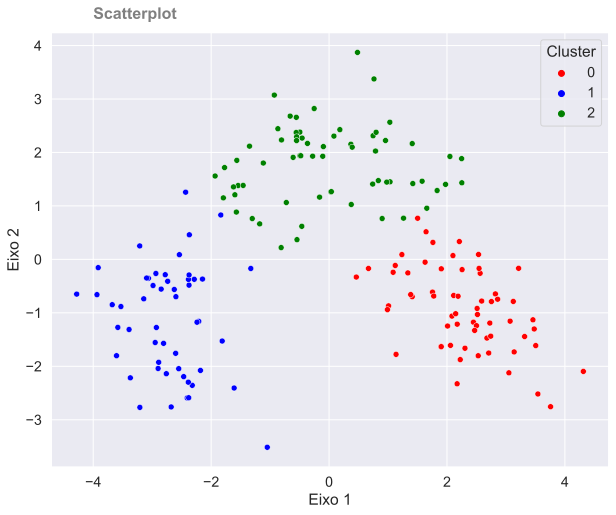

In [32]:
# Plotando o Gráfico

Cores = ['red','blue','green']

fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x='Eixo_1',y='Eixo_2',data=A,hue='Cluster',palette=Cores)
plt.xlabel('Eixo 1')
plt.ylabel('Eixo 2')

# Adicionando um título
plt.text(x=-4,
        y=4.5,
        s='Scatterplot',
        fontsize=16,
        color='grey',
        weight='bold');